In [13]:
import xarray as xr
import os

granule_urls = [
    "/content/granule1.nc",
    "/content/granule2.nc"
]

# Load datasets with error handling for truncated files
datasets = []
for url in granule_urls:
    try:
        ds = xr.open_dataset(url)
        datasets.append(ds)
        print(f"Successfully loaded dataset from {url}")
    except OSError as e:
        if "truncated file" in str(e):
            print(f"Error: File {url} appears to be truncated or corrupted. Please re-upload the file.")
        else:
            print(f"An unexpected error occurred while opening {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while opening {url}: {e}")


# Optional: print info
for i, ds in enumerate(datasets, start=1):
    print(f"\nGranule {i}:")
    print(ds)

# Combine along time (or new dimension if time doesn't exist)
if datasets: # Only attempt to concatenate if there are datasets
    try:
        combined_ds = xr.concat(datasets, dim="time")
        print("\nCombined Dataset Info:")
        print(combined_ds)
    except Exception as e:
        print(f"An error occurred during dataset concatenation: {e}")
else:
    print("\nNo datasets were successfully loaded to combine.")

Error: File /content/granule1.nc appears to be truncated or corrupted. Please re-upload the file.
Successfully loaded dataset from /content/granule2.nc

Granule 1:
<xarray.Dataset> Size: 9kB
Dimensions:      (xtrack: 2048, mirror_step: 136)
Coordinates:
  * xtrack       (xtrack) int32 8kB 0 1 2 3 4 5 ... 2043 2044 2045 2046 2047
  * mirror_step  (mirror_step) int32 544B 272 273 274 275 ... 404 405 406 407
Data variables:
    *empty*
Attributes: (12/35)
    tio_commit:                       482bb1eedf3be832ea377a03017f20b435365760
    product_type:                     NO2
    processing_level:                 2
    processing_version:               2
    sdpc_version:                     TEMPO_SDPC_v4.7.0
    near_real_time:                   1
    ...                               ...
    institution:                      Smithsonian Astrophysical Observatory
    creator_url:                      http://tempo.si.edu
    Conventions:                      CF-1.6, ACDD-1.3
    coremetadat

In [14]:
import xarray as xr
import os

granule_urls = [
    "/content/granule1.nc",
    "/content/granule2.nc"
]

# Load datasets with error handling for truncated files
datasets = []
for url in granule_urls:
    try:
        ds = xr.open_dataset(url)
        datasets.append(ds)
        print(f"Successfully loaded dataset from {url}")
    except OSError as e:
        if "truncated file" in str(e):
            print(f"Error: File {url} appears to be truncated or corrupted. Please re-upload the file.")
        else:
            print(f"An unexpected error occurred while opening {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while opening {url}: {e}")


# Optional: print info
for i, ds in enumerate(datasets, start=1):
    print(f"\nGranule {i}:")
    print(ds)

# Combine along time (or new dimension if time doesn't exist)
if datasets: # Only attempt to concatenate if there are datasets
    try:
        combined_ds = xr.concat(datasets, dim="time")
        print("\nCombined Dataset Info:")
        print(combined_ds)
    except Exception as e:
        print(f"An error occurred during dataset concatenation: {e}")
else:
    print("\nNo datasets were successfully loaded to combine.")

Error: File /content/granule1.nc appears to be truncated or corrupted. Please re-upload the file.
Successfully loaded dataset from /content/granule2.nc

Granule 1:
<xarray.Dataset> Size: 9kB
Dimensions:      (xtrack: 2048, mirror_step: 136)
Coordinates:
  * xtrack       (xtrack) int32 8kB 0 1 2 3 4 5 ... 2043 2044 2045 2046 2047
  * mirror_step  (mirror_step) int32 544B 272 273 274 275 ... 404 405 406 407
Data variables:
    *empty*
Attributes: (12/35)
    tio_commit:                       482bb1eedf3be832ea377a03017f20b435365760
    product_type:                     NO2
    processing_level:                 2
    processing_version:               2
    sdpc_version:                     TEMPO_SDPC_v4.7.0
    near_real_time:                   1
    ...                               ...
    institution:                      Smithsonian Astrophysical Observatory
    creator_url:                      http://tempo.si.edu
    Conventions:                      CF-1.6, ACDD-1.3
    coremetadat

In [11]:
!ls /content/


granule1.nc  granule2.nc  sample_data


In [15]:
import pandas as pd

# Convert xarray Dataset to pandas DataFrame
df = combined_ds.to_dataframe().reset_index()

# Quick look at the data
print(df.head())
print(df.columns)
print(df.info())
print(df.describe())


   xtrack  mirror_step
0       0          272
1       0          273
2       0          274
3       0          275
4       0          276
Index(['xtrack', 'mirror_step'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278528 entries, 0 to 278527
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   xtrack       278528 non-null  int64
 1   mirror_step  278528 non-null  int64
dtypes: int64(2)
memory usage: 4.3 MB
None
              xtrack    mirror_step
count  278528.000000  278528.000000
mean     1023.500000     339.500000
std       591.207666      39.258827
min         0.000000     272.000000
25%       511.750000     305.750000
50%      1023.500000     339.500000
75%      1535.250000     373.250000
max      2047.000000     407.000000


In [16]:
if 'retrieval_quality_flag' in df.columns:
    df_clean = df[df['retrieval_quality_flag'] == 0].copy()
else:
    df_clean = df.copy()

print(f"Rows before filtering: {len(df)}")
print(f"Rows after filtering: {len(df_clean)}")


Rows before filtering: 278528
Rows after filtering: 278528


In [17]:
# Check for missing values
print(df_clean.isna().sum())

# Drop rows where NO2 or key variables are missing
if 'vertical_column_troposphere' in df_clean.columns:
    df_clean = df_clean.dropna(subset=['vertical_column_troposphere'])


xtrack         0
mirror_step    0
dtype: int64


In [18]:
# Check coordinate ranges
print(df_clean['xtrack'].min(), df_clean['xtrack'].max())
print(df_clean['mirror_step'].min(), df_clean['mirror_step'].max())

# Optional: explore temporal coverage if 'time' exists
if 'time' in df_clean.columns:
    print(df_clean['time'].min(), df_clean['time'].max())


0 2047
272 407


In [19]:
# Summary stats of NO2
if 'vertical_column_troposphere' in df_clean.columns:
    print(df_clean['vertical_column_troposphere'].describe())


In [20]:
if 'cloud_fraction' in df_clean.columns:
    df_clean = df_clean[df_clean['cloud_fraction'] < 0.3]  # keep mostly clear data


In [21]:
df_clean.to_csv("TEMPO_NO2_L2_NRT_cleaned.csv", index=False)
print("Cleaned data saved as TEMPO_NO2_L2_NRT_cleaned.csv")


Cleaned data saved as TEMPO_NO2_L2_NRT_cleaned.csv


In [23]:
%matplotlib inline


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# Histogram of NO2
if 'vertical_column_troposphere' in df_clean.columns:
    plt.hist(df_clean['vertical_column_troposphere'], bins=50)
    plt.xlabel("Tropospheric NO2 (molecules/cm²)")
    plt.ylabel("Frequency")
    plt.title("NO2 Distribution (Cleaned Data)")
    plt.show()


In [25]:
plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

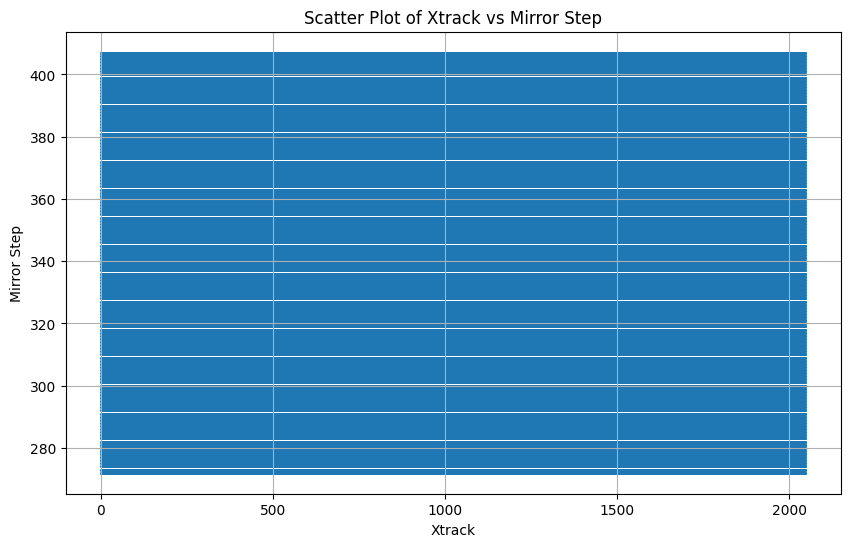

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['xtrack'], df_clean['mirror_step'], s=1) # Use s=1 for smaller points
plt.xlabel("Xtrack")
plt.ylabel("Mirror Step")
plt.title("Scatter Plot of Xtrack vs Mirror Step")
plt.grid(True)
plt.show()

In [28]:
print(df_clean.columns)


Index(['xtrack', 'mirror_step'], dtype='object')


In [31]:
# Save dataframe as CSV in Colab folder
df.to_csv("tempo_no2_data.csv", index=False)

# Download the file
from google.colab import files
files.download("tempo_no2_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>